In [1]:
#!/usr/bin/env python  

"""
File Name: qeplotdos2.py
Created Time: 2022-01-06 16:53:09
Author: Prof. KESONG YANG,  UC San Diego  
Mail: kesong@ucsd.edu

A simple python code to plot density of states (DOS) produced from Quantum Espresso 
This script uses pandas, matplotlib
Usage example: qeplotdos.py Si2_dos.dat
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os, os.path, sys, re, bz2

#os.system("open " + outfile)

# vim: tabstop=4 expandtab shiftwidth=4 softtabstop=4



In [2]:
# dosfile = sys.argv[1]
# system_name = dosfile.replace(".dat","")

#read data
#undoped, Cl-doped, Al-doped
titles = ['ZnO', 'ZnO:Cl', 'ZnO:Al']
dosfiles = ['Zn36O36.dos.dat','ZnO_Cl_dos.dat','Zn35O36Al.dos_1.dat']

Es = []
Ss = []
fermis = []

for dosfile in dosfiles:
    with open(dosfile, 'r', encoding='utf-8') as f:
        lines = f.read()
        first = lines.split("\n")[0]
        vdata = first.split()
        Efermi = float(vdata[-2])
    data = pd.read_csv(dosfile, header=1, delim_whitespace=True)
    num_col = len(data.columns)
    E = np.array(data[data.columns[0]])
    S = np.array(data[data.columns[1]])

    Es.append(E)
    Ss.append(S)
    fermis.append(Efermi)

print(titles)
print(Es)
print(Ss)
print(fermis)

['ZnO', 'ZnO:Cl', 'ZnO:Al']
[array([-1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
        5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,
        9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1,
       10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2,
       11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3,
       12.4, 12.5, 12.

8.2 7.7
7.6 7.0
8.2 7.7


Text(-0.03, 0.5, 'Density of States')

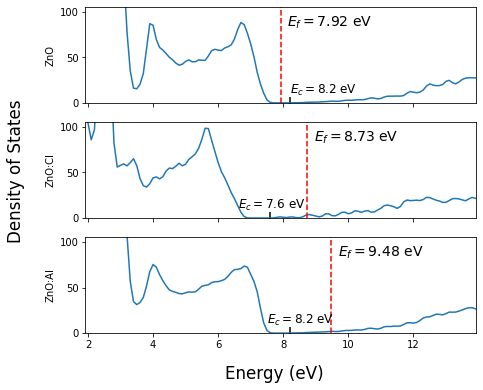

In [3]:
##CHOOSE DIRECTION OF PLOTS
TILED_VERTICAL = True #if false, tiled horizontal instead    

#IGNORE AL FOR NOW


#create plot
nrows, ncols = (3,1) if TILED_VERTICAL else (1,3)
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex='all', sharey='all', figsize = (7, 6))
plt.rc('font',size = 14)

#bounds will depend on if plot is tiled vertical or horizontal
if TILED_VERTICAL:
    elim = plt.xlim
    doslim = plt.ylim
else:
    doslim = plt.xlim
    elim = plt.ylim
#limits are fixed, based on the undoped ZnO, so we'll have a fixed point of comparison to doped
elim(fermis[0] - 6, fermis[0] + 6)
doslim(0, max(Ss[0])*0.3)

for i in range(max([nrows, ncols])):
    plt.subplot(nrows, ncols, i+1)

    if TILED_VERTICAL:
        x = Es[i]
        y = Ss[i]
        fermilinefunc = plt.axvline
        textposx = fermis[i] + 0.2
        textposy = axs[i].get_ylim()[1] * 0.8
        titlelabel = plt.ylabel
    else:
        x = Ss[i]
        y = Es[i]
        fermilinefunc = plt.axhline
        textposy = fermis[i] + 0.2
        textposx = axs[i].get_xlim()[1] * 0.2
        titlelabel = plt.xlabel

    #ignore empty parts
    # notempty = np.where(y > 1e-1)[0]
    # x = x[notempty]
    # y = y[notempty]

    plt.plot(x, y, '-')

    # find cb band edge
    empty = x[np.where(y <= 1e-1)[0]]
    vbedge = empty[np.where(empty > 6)[0][0]]
    cbedge = empty[np.where(empty < 10)[0][-1]]
    print(cbedge, vbedge)

    plt.scatter(cbedge, 0, s=150, c='black', marker=matplotlib.markers.MarkerStyle('|'), )

    if i == 0:
        cbedgetextpos = cbedge
    elif i == 1:
        cbedgetextpos = cbedge - 1
    else:
        cbedgetextpos = cbedge - 0.7
    plt.text(cbedgetextpos, axs[i].get_ylim()[1] * 0.1, f'$E_c = {cbedge:.1f}$ eV', size = 12)

    
    # plt.scatter(vbedge, 0, s=100, c='r', marker=matplotlib.markers.MarkerStyle('|'), )
    # plt.text(vbedge, axs[i].get_ylim()[1] * -0.1, f'$E_v = {vbedge:.1f}$ eV', size = 12)
    

    #draw Fermi level line
    fermilinefunc(fermis[i], color='r', linestyle='--')
    textstr = f'$E_f = {fermis[i]:.2f}$ eV'
    plt.text(textposx, textposy, textstr)
    titlelabel(titles[i])


# plt.xlabel('Energy (eV)')
# plt.ylabel('Density of States')
if TILED_VERTICAL:
    supxlabel = 'Energy (eV)'
    supylabel = 'Density of States'
else:
    supxlabel = 'Density of States'
    supylabel = 'Energy (eV)'
fig.supxlabel(supxlabel)
fig.supylabel(supylabel, x = (-0.03 if TILED_VERTICAL else 0))
#outfile = system_name + "_DOS.eps"
#plt.savefig(outfile, format='eps', dpi=1000)
